# CREDIT RISK ASSESSMENT AND LOAN PREDICTION

*GROUP 3*
1. Grace Gitau
2. Kelvin Letimalo
3. Grace Wacheke
4. David Chege
5. Faith Wanjala

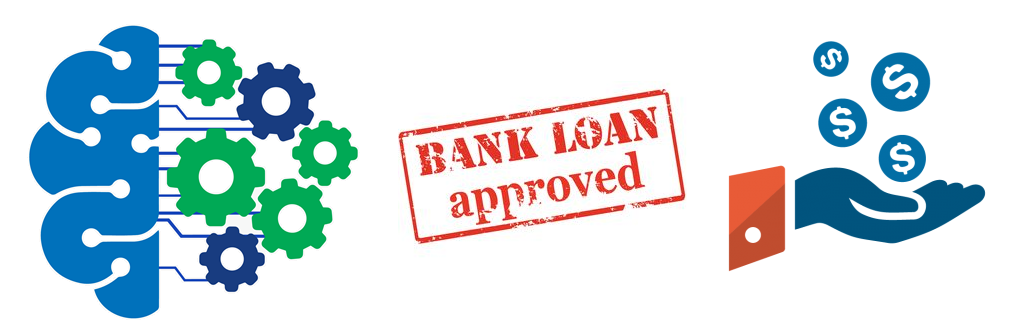

# Overview
With the increasing importance of consumer credit and lending practices, the importance of accurate and efficient credit risk assessment for both financial institution and the customer cannot be overstated. These processes not only protect the financial health of banks but also increase credits volume, ensure responsible lending practices that support economic stability and ensure loans are granted to reliable customers. Misjudging an applicant’s risk can lead to financial losses for the institution. Similarly, inaccurately estimating the loan amount can either burden the customer with more than they can handle or limit their potential to use the loan effectively.

# Business Understanding
Financial institutions to accurately predict the suitable loan amount to borrowers without exposing them to excessive risk is essential. Credit Risk Classification focuses on segregating loan applicants into different categories based on their creditworthiness. This classification helps financial institutions determine the level of risk associated with lending to each borrower, thereby impacting the decision-making process regarding loan approvals and interest rates.

Conversely, Loan Amount Prediction involves creating a predictive model to estimate the most appropriate loan amount based on a thorough analysis of an applicant’s financial health indicators. This includes income level, employment stability, credit history, existing debts, and more. The aim is to determine the optimal loan amount that aligns with the borrower’s ability to repay without causing financial strain, thus minimizing the risk of default.

By incorporating machine learning techniques using Python, borrowers can make informed decisions that strike a balance between promoting credit access and maintaining a healthy loan portfolio.

# Data Understanding
The dataset consists of 32,581 observations of 12 variables. The definitions are as follows:
 - person_age: The age of the borrower when securing the loan.
 - person_income: The borrower’s annual earnings at the time of the loan.
 - person_home_ownership: Type of home ownership.
 - person_emp_length: The amount of time in years that the borrower is employed.
 - loan_intent: Loan purpose.
 - loan_grade: Classification system based on credit history, collateral quality, and likelihood of repayment.
    - A: The borrower has a high creditworthiness, indicating low risk.
    - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C: The borrower’s creditworthiness is moderate.
    - D: The borrower is considered to have higher risk compared to previous grades.
    - E: The borrower’s creditworthiness is lower, indicating a higher risk.
    - F: The borrower poses a significant credit risk.
    - G: The borrower’s creditworthiness is the lowest, signifying the highest risk.
 - loan_amnt: Total amount of the loan.
 - loan_int_rate: Interest rate of the loan.
 - loan_status: Dummy variable indicating default (1) or non-default (0).
 A default occurs when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments on interest or principal owed.
 - loan_percent_income: Ratio between the loan amount and the annual income.
 - cb_person_cred_hist_length: The number of years of personal history since the first loan taken.
 - cb_person_default_on_file: Indicates if the person has previously defaulted.


## Objectives
1. Credit Risk Classification: Categorizing loan applicants based on their creditworthiness to make informed decisions about loan approvals and interest rates.
2. Loan Amount Prediction: Predicting suitable loan amounts for approved applicants, balancing their financial needs with the risk of default.

# 1. Data Preparation & Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
credit_risk  = pd.read_csv('credit_risk_dataset.csv')
credit_risk .head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Data exploration
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# Summary statistics
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


The summary statistics show the distribution of each numerical feature in the dataset. 
Notably, the maximum age (144 years) or max of 123 years of employment is not realistic, indicating potential outliers in the dataset. 
Similarly, the employment length and loan interest rate contain missing values that will need to be addressed.

# 2. Data Cleaning

In [5]:
# Checking for duplicated values
credit_risk.duplicated().sum()

165

In [6]:
# Remove duplicates
credit_risk = credit_risk.drop_duplicates()

In [7]:
# Replacing invalid age values
credit_risk = credit_risk[credit_risk['person_age'] <= 70]

In [8]:
# Handling missing values

# The 'person_emp_length' variable has 895 NA values. 
# We replace these with the mode, and exclude rows where work experience exceeds 60 years.
credit_risk['person_emp_length'].fillna(credit_risk['person_emp_length'].mode()[0], inplace=True)
credit_risk = credit_risk[credit_risk['person_emp_length'] <= 60]

# The 'loan_int_rate' variable has 3,116 NA values which we replace with the median value.
credit_risk['loan_int_rate'].fillna(credit_risk['loan_int_rate'].median(), inplace=True)

In [9]:
# Checking for duplicates again
credit_risk.duplicated().sum()

0

C:\Users\Han\AppData\Local\Temp\ipykernel_6576\3715675200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='person_income', data=credit_risk, palette='Set3')


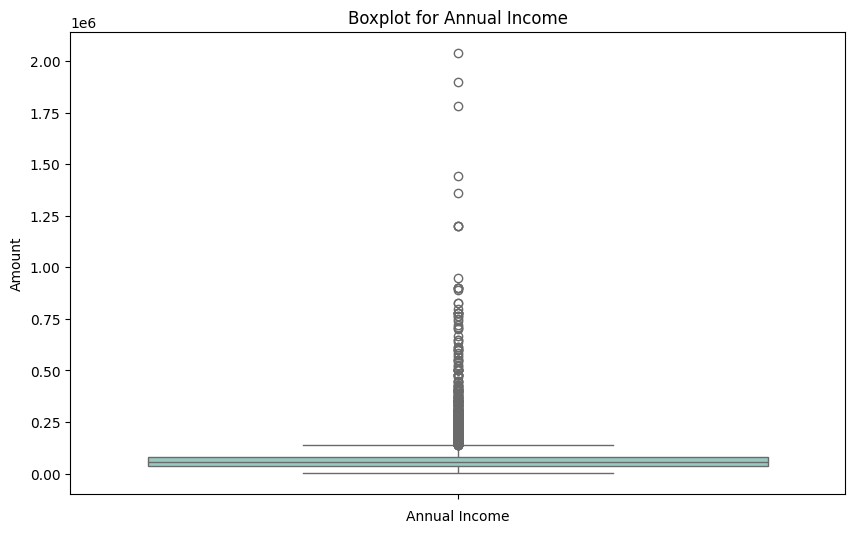

In [10]:
#Checking for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='person_income', data=credit_risk, palette='Set3')
plt.title('Boxplot for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Amount')
plt.show()

The boxplot indicates potential outliers in annual income, particularly high-income values above the 95th percentile. 
Further examination of these outliers is required.

In [11]:
# Handling outliers
# Checking high incomes
high_income = credit_risk[credit_risk['person_income'] > 1000000]
print(high_income)

       person_age  person_income person_home_ownership  person_emp_length  \
17833          32        1200000              MORTGAGE                1.0   
29119          36        1200000                   OWN               16.0   
29120          40        1200000              MORTGAGE                1.0   
30049          42        2039784                  RENT                0.0   
31922          47        1362000              MORTGAGE                9.0   
31924          44        1440000              MORTGAGE                7.0   
32497          63        1782000                  RENT               13.0   
32546          60        1900000              MORTGAGE                5.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
17833            VENTURE          A      12000           7.51            0   
29119            MEDICAL          A      10000           6.54            0   
29120            MEDICAL          A      10000          10.99           

In [12]:
# Data transformation for analysis
# Grouping age
credit_risk['age_group'] = pd.cut(credit_risk['person_age'], bins=[20, 30, 40, 50, 60, 70], 
                                  labels=['21-30', '31-40', '41-50', '51-60', '61-70'])

# Grouping income (B40, M40, T20 classification based on income levels in the dataset)
income_bins = [0, 30720, 41280, 51720, 63000, 76080, 92280, 113400, 141840, 190440, credit_risk['person_income'].max()]
income_labels = ['<30720', '30721-41280', '41281-51720', '51721-63000', '63001-76080', 
                 '76081-92280', '92281-113400', '113401-141840', '141841-190440', '>190440']
credit_risk['income_group'] = pd.cut(credit_risk['person_income'], bins=income_bins, labels=income_labels)

# Display transformed data
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,21-30,<30720
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,21-30,<30720
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,21-30,63001-76080
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,21-30,51721-63000
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,21-30,<30720


## Exploratory Data Analysis

### Univariate analysis

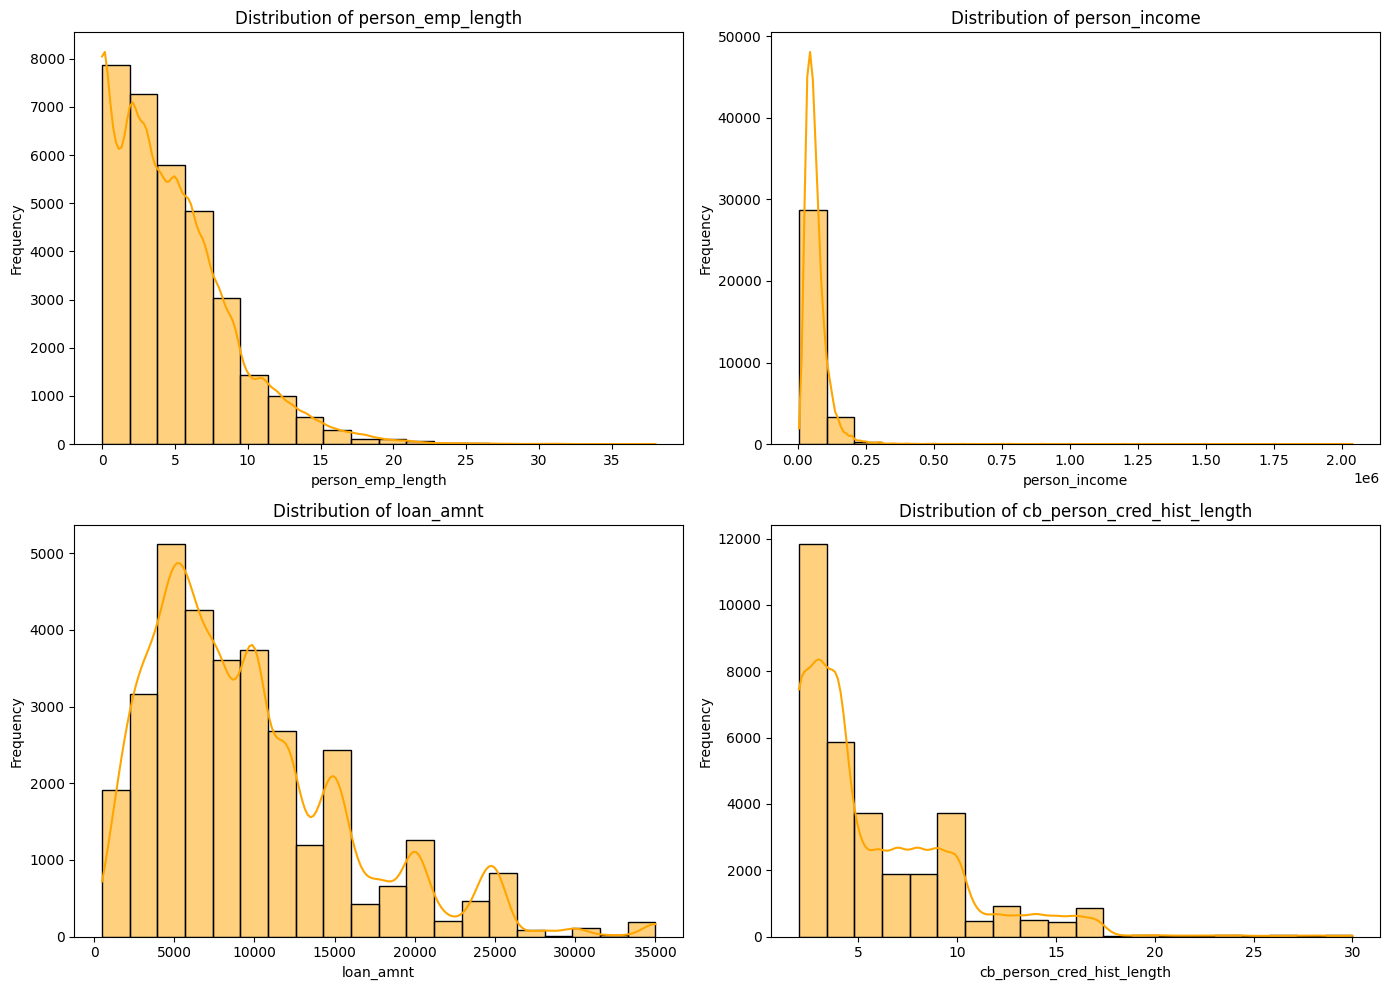

In [13]:
# Exploratory Data Analysis

# List of numerical columns
num_cols = ['person_emp_length', 'person_income', 'loan_amnt', 'cb_person_cred_hist_length']

# Setting the figure size
plt.figure(figsize=(14, 10))

# Creating subplots for each numerical feature
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    
    # Plotting the distribution of each column
    sns.histplot(credit_risk[col], bins=20, kde=True, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The distribution of numerical features; employment experience, income, loan amount, and credit history are positively skewed, meaning that most individuals in the dataset have relatively lower values for these variables.

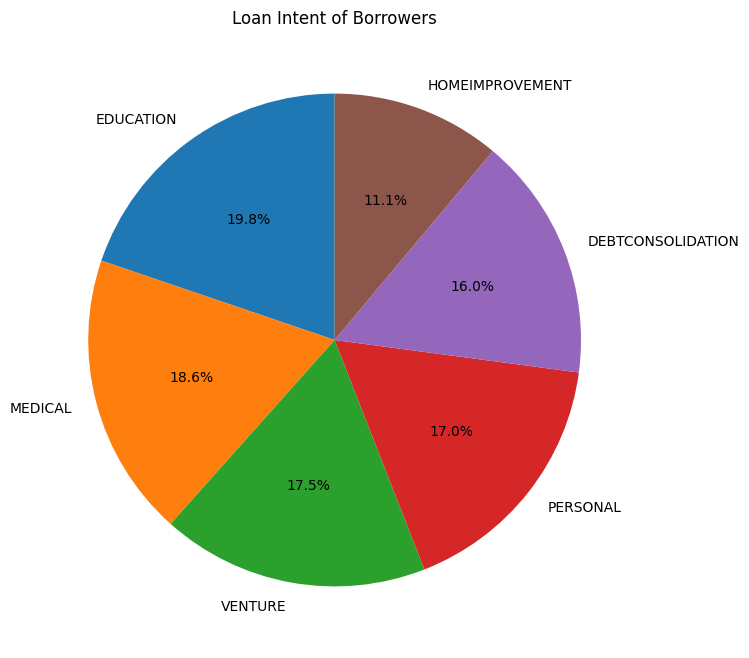

In [14]:
# Loan Intent
plt.figure(figsize=(8, 8))
loan_intent_counts = credit_risk['loan_intent'].value_counts()
plt.pie(loan_intent_counts, labels=loan_intent_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Intent of Borrowers')
plt.show()

From the Loan Intention of Borrower pie chart above, it outlines the distribution of borrowers taking out loans for various purposes. It shows that educational purposes represent the highest percentage at 19.86%. This suggests that a significant portion of borrowers are investing in their education, possibly to further their careers or pursue higher levels of education.On the other hand, home improvement purposes represent the lowest percentage at 11.08%, indicating a smaller but still notable portion are investing in renovating or upgrading their homes.

The majority of loans are intended for educational purposes, which may reflect the growing importance of educational financing.

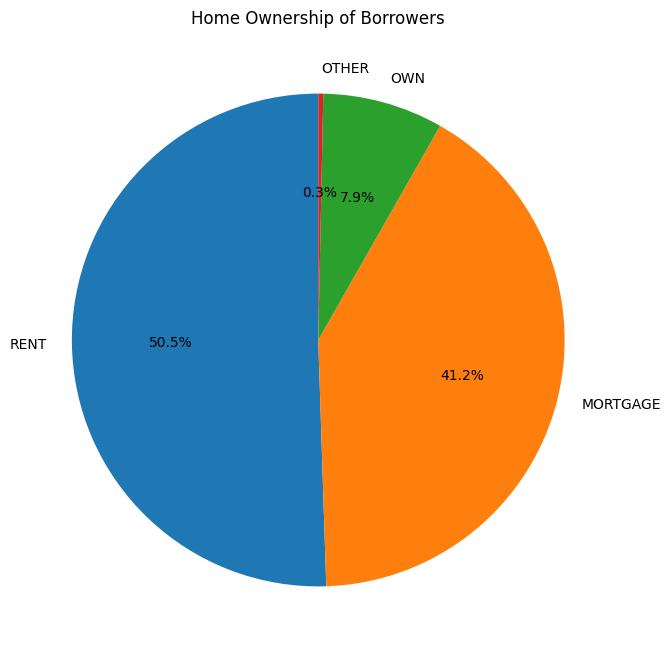

In [15]:
# Home Ownership
plt.figure(figsize=(8, 8))
home_ownership_counts = credit_risk['person_home_ownership'].value_counts()
plt.pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Home Ownership of Borrowers')
plt.show()

From the Home Ownership of Borrower pie chart above, it shows that renting is the most popular choice for borrower homeownership, comprising 50.7% of the dataset, followed closely by mortgage holders at 41.3%. Conversely, the “others” category constitutes the smallest portion at 0.3%. The “others” category likely includes borrowers with unconventional housing arrangements, such as living with family or in alternative housing situations. In conclusion, most borrower who secure loans do not own their house.

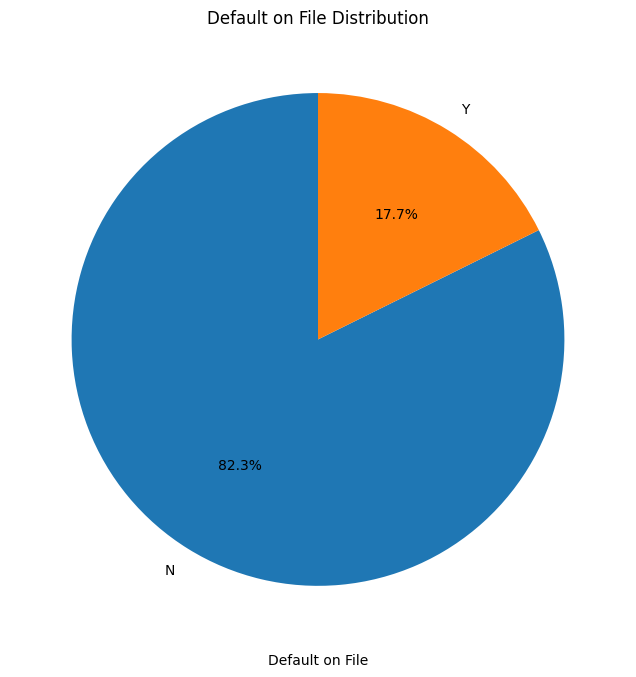

In [16]:
# Default Status on File Distribution
plt.figure(figsize=(8, 8))
default_on_file_counts = credit_risk['cb_person_default_on_file'].value_counts()
plt.pie(default_on_file_counts, labels=default_on_file_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Default on File Distribution')
plt.xlabel('Default on File')
plt.show()

From the graph above, it illustrates that 82% of borrowers having a history of defaults on their loans, suggesting that there is a prevalent trend of financial difficulties among borrowers. Conversely, 18% of borrowers stand out for their clean repayment records, indicating a minority who have managed to navigate their financial obligations successfully.

### Bivariate Analysis

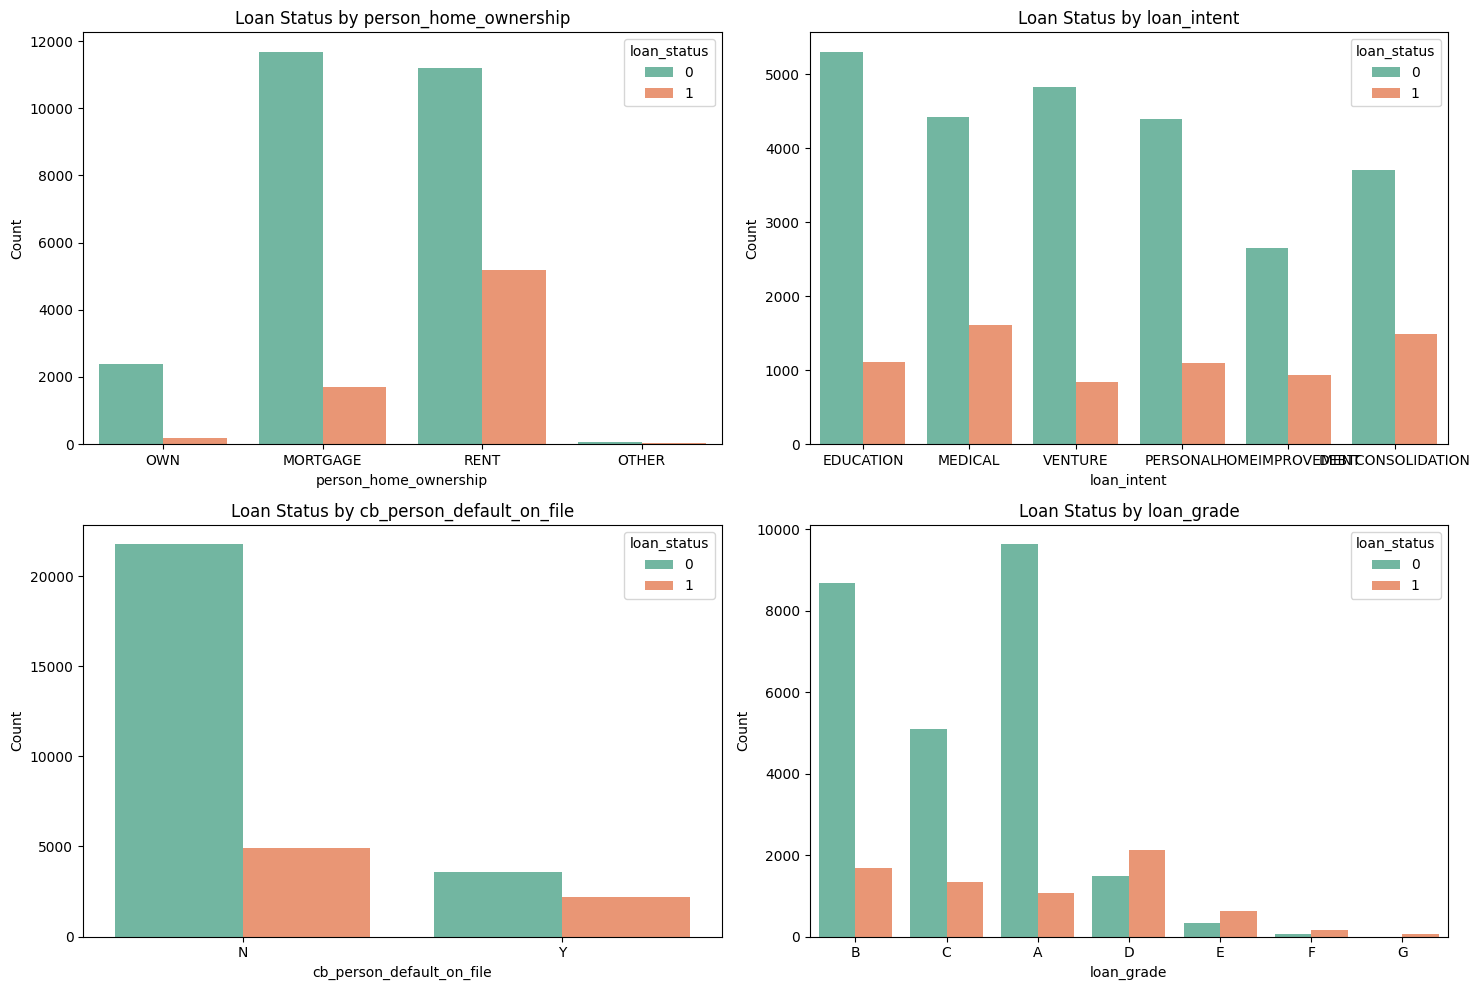

In [17]:
# Bivariate Analysis - Default Status across Demographics
plt.figure(figsize=(15, 10))

# Creating subplots for each demographic feature
features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='loan_status', data=credit_risk, palette='Set2')
    plt.title(f'Loan Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The data analysis for the above graphs reveals several interesting trends regarding loan statuses across different borrower demographics and loan characteristics. Borrowers with home ownership of rent and securing loans for education purposes exhibit the highest non-default loan status indicating successful repayment and adherence to agreed-upon terms. Additionally, borrowers with no default history maintain the highest non-default loan status further emphasizing the correlation between past repayment performance and current loan status. Notably, loans graded as Grade A also correspond to the highest non-default loan status, indicating that loans classified under this grade are associated with lower default risk and higher levels of successful repayment. These findings underscore the importance of factors such as homeownership status, loan purpose, credit history, and loan grading in determining borrower loan statuses and repayment outcomes.

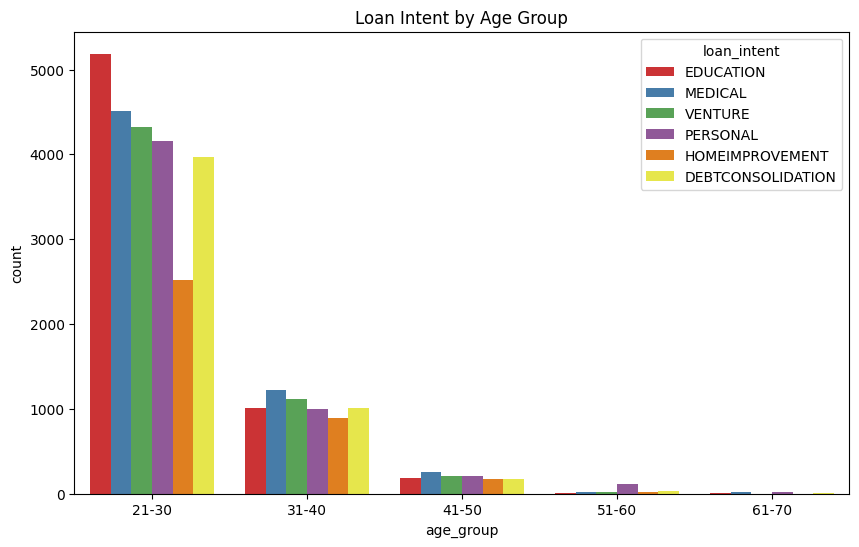

In [18]:
# Barplot for Loan Intent and Loan Status by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan_intent', data=credit_risk, palette='Set1')
plt.title('Loan Intent by Age Group')
plt.show()

The graph above shows an insight into the borrowing patterns of different age groups and the reasons behind their loan acquisitions. Borrowers aged 21-30 emerge as the highest demographic securing loans, with education being the predominant reason and home improvement ranks lowest. This suggests a focus on investing in education and potentially early career development among younger borrowers. Next, it demonstrated that borrowers aged 31-40 and 41-50 has medical reasons being the main reasons, indicating a shift towards addressing healthcare needs or concerns in this age range. For borrowers aged 51-60 and 61-70, personal reasons become the primary motivator for securing loans, highlighting a diverse range of borrower financial needs or aspirations in these older age groups. These findings underscore the importance of understanding demographic-specific borrowing behaviors and tailoring financial products and services to meet the evolving needs of different age cohorts.

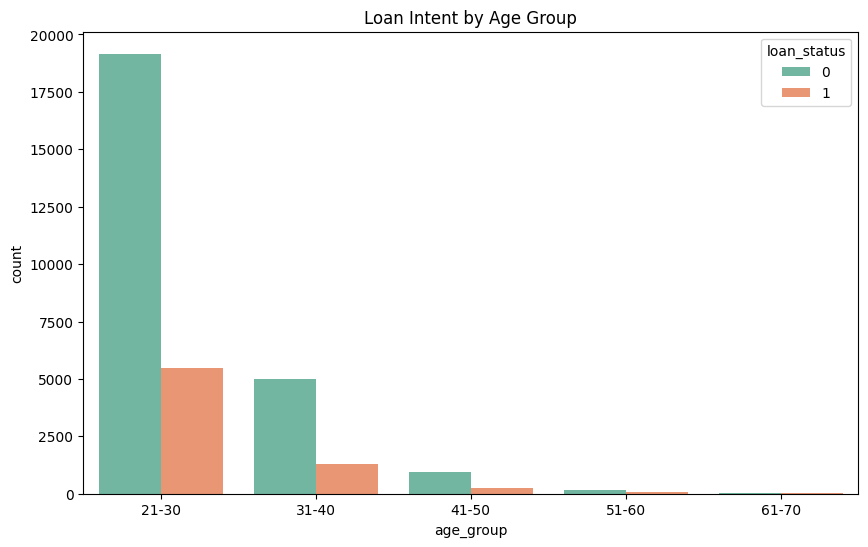

In [19]:
# Barplot for Loan Intent and Loan Status by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan_status', data=credit_risk, palette='Set2')
plt.title('Default Status by Age Group')
plt.show()

C:\Users\Han\AppData\Local\Temp\ipykernel_6576\2579448809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_int_rate', data=credit_risk, palette='Set3')


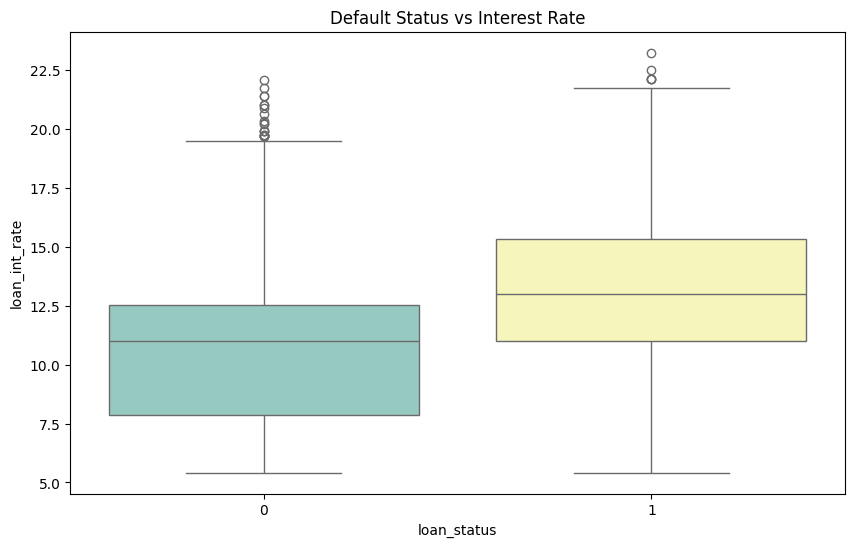

C:\Users\Han\AppData\Local\Temp\ipykernel_6576\2579448809.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='person_income', data=credit_risk, palette='Set3')


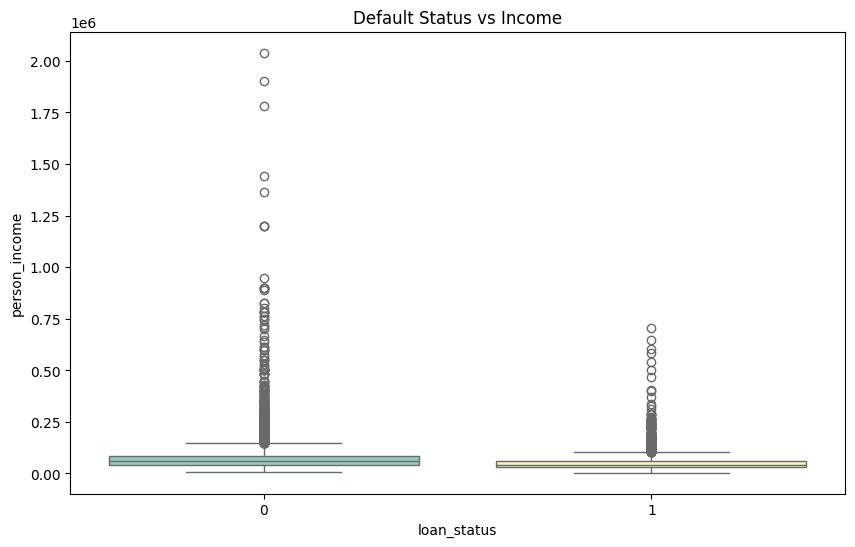

C:\Users\Han\AppData\Local\Temp\ipykernel_6576\2579448809.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amnt', data=credit_risk, palette='Set3')


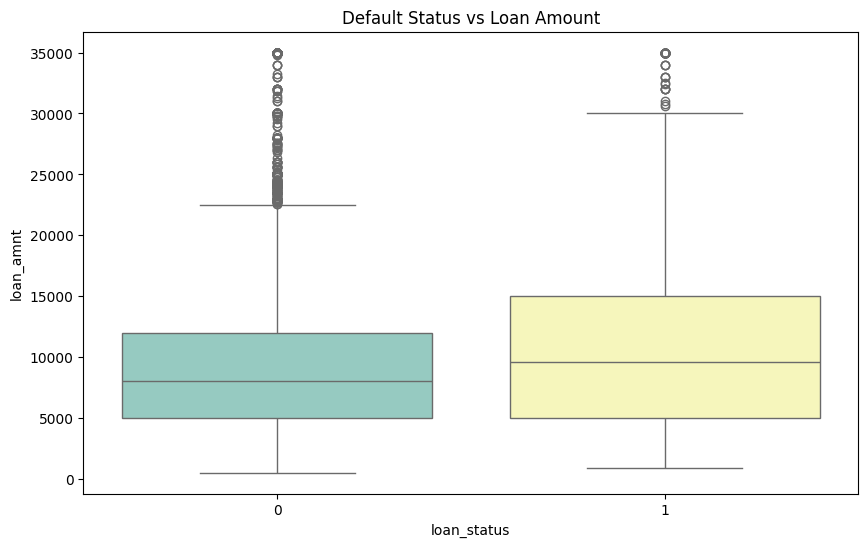

In [20]:
# Boxplots for Default Status vs Interest Rate, Income, and Loan Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=credit_risk, palette='Set3')
plt.title('Default Status vs Interest Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_income', data=credit_risk, palette='Set3')
plt.title('Default Status vs Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=credit_risk, palette='Set3')
plt.title('Default Status vs Loan Amount')
plt.show()

The graph above illustrates a comparison of default risk with three variables which are interest rates, yearly income, and loan amount. It shows that higher interest rates, a lower income and higher credit increase the possibility to have a default. This insight underscores the significance of these factors in determining the risk profile of borrowers. Specifically, borrowers facing higher interest rates may struggle with repayment, while those with lower incomes might find it challenging to meet their financial obligations. Additionally, larger loan amounts may increase the burden on borrowers, potentially leading to higher default rates. Understanding these relationships is crucial for financial institution to assess risk effectively and tailor lending practices to mitigate default risks, ultimately promoting financial stability for borrowers.

C:\Users\Han\AppData\Local\Temp\ipykernel_6576\1269804142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_grade', y='loan_amnt', data=credit_risk, palette='Set3')


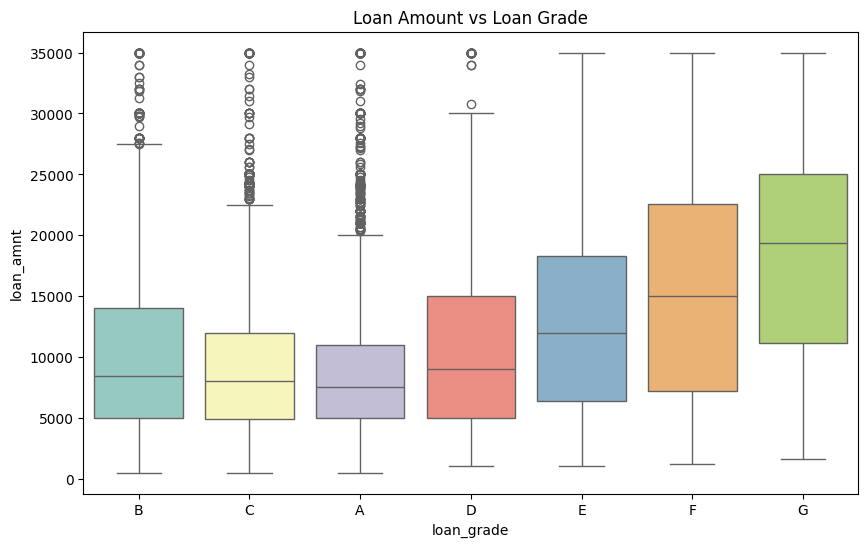

In [21]:
# Loan amount vs loan grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_grade', y='loan_amnt', data=credit_risk, palette='Set3')
plt.title('Loan Amount vs Loan Grade')
plt.show()

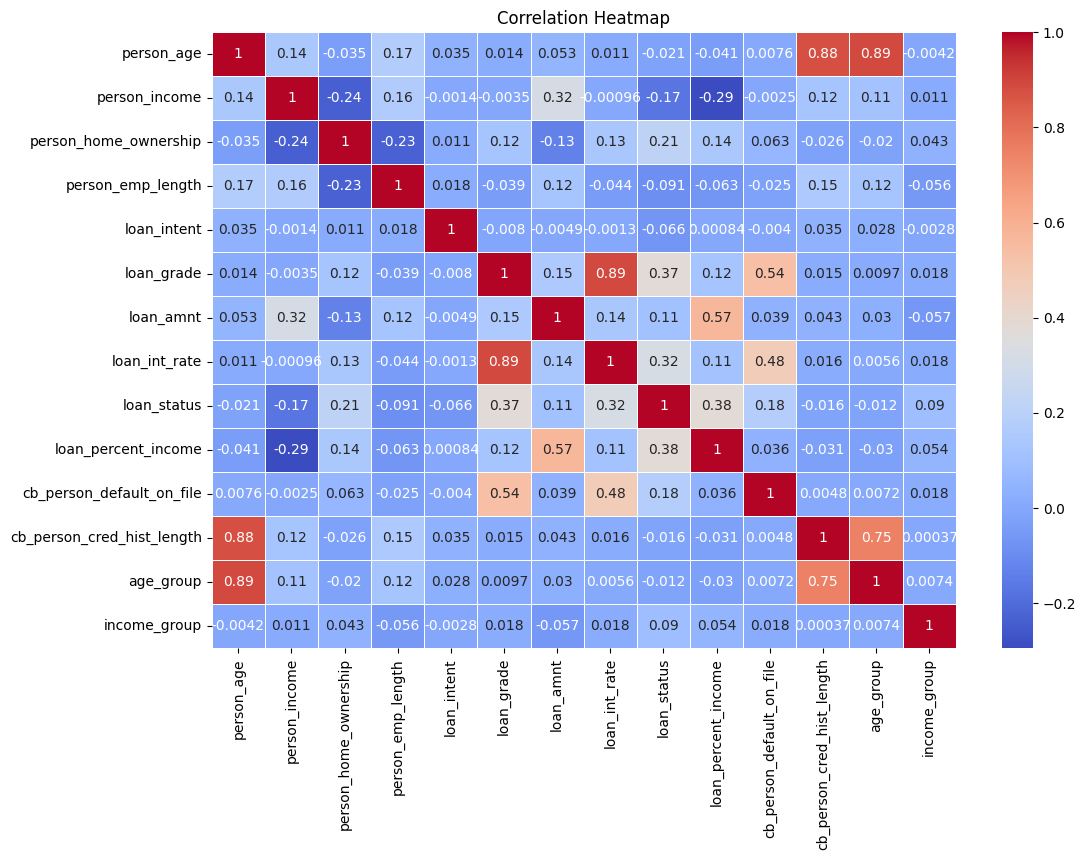

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original
credit_risk_encoded = credit_risk.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in credit_risk_encoded.select_dtypes(include=['object', 'category']).columns:
    credit_risk_encoded[column] = label_encoder.fit_transform(credit_risk_encoded[column])

# Create a correlation matrix
correlation_matrix = credit_risk_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap provides valuable insights revealing both strong and moderate correlations. 
Notably, there is a strong positive correlation between `loan_grade` and `loan_int_rate` (0.89), indicating that higher loan grades are associated with higher interest rates, which may suggest riskier loans have steeper costs. 

Similarly, `cb_person_cred_hist_length` is strongly correlated with `person_age` (0.88), implying that older individuals tend to have longer credit histories, potentially affecting their eligibility for loans. 
On the other hand, a moderate positive correlation exists between `person_income` and `loan_amnt` (0.32), indicating that higher income levels are linked to larger loan amounts. 

However, a notable negative correlation between `person_income` and `loan_percent_income` (-0.29) suggests that as income increases, the proportion of income allocated to loans tends to decrease, reflecting more prudent financial behavior among higher earners. 
Additionally, the strong negative correlation between `age_group` and `person_age` (-0.89) highlights that older individuals often fall into higher age categories, a finding that could aid in demographic segmentation during risk assessment. 

These correlations can serve as critical indicators for model development, guiding feature selection and engineering in your loan prediction analysis, thus enhancing the effectiveness of your credit risk assessment model.

# Modelling

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, classification_report,
                             recall_score, f1_score, mean_squared_error, r2_score, 
                             roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

## Credit Risk Classification

In this task, we aim to develop machine learning models to identify and predict the credit risk categories of loan applicants. The credit scoring process for borrowers is crucial for minimizing the credit risk faced by financial institutions, and the outcome of this analysis will inform decisions on whether to accept or reject new loan applications. We will classify and predict risk based on the loan status (0 = paid; 1 = unpaid) using Random Forest and Logistic Regression models. The Random Forest classifier is chosen for its robustness and high accuracy, making it well-suited for complex classification tasks. Conversely, Logistic Regression provides an interpretable framework for binary classification, allowing stakeholders to understand the underlying factors influencing credit risk.

In [24]:
# Splitting the data into features and target variable
X = credit_risk.drop(['loan_status', 'loan_amnt'], axis=1)
y = credit_risk['loan_status']

# Encoding categorical features
X = pd.get_dummies(X, drop_first=True)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Baseline Classification Model: Decision Tree

The Decision Tree model was chosen as a baseline for credit risk classification due to its simplicity and interpretability. It provides a clear structure for understanding how different borrower features influence loan outcomes. This model serves as a benchmark against which more complex models, such as Random Forest, and Logistic Regression can be compared.

person_age                     0.046925
person_income                  0.134139
person_emp_length              0.058238
loan_int_rate                  0.164520
loan_percent_income            0.248459
cb_person_cred_hist_length     0.027078
person_home_ownership_OTHER    0.001965
person_home_ownership_OWN      0.010805
person_home_ownership_RENT     0.134839
loan_intent_EDUCATION          0.010171
loan_intent_HOMEIMPROVEMENT    0.025702
loan_intent_MEDICAL            0.029630
loan_intent_PERSONAL           0.013539
loan_intent_VENTURE            0.016936
loan_grade_B                   0.002933
loan_grade_C                   0.020211
loan_grade_D                   0.025732
loan_grade_E                   0.003425
loan_grade_F                   0.002149
loan_grade_G                   0.003515
cb_person_default_on_file_Y    0.003856
age_group_31-40                0.002238
age_group_41-50                0.000678
age_group_51-60                0.000113
age_group_61-70                0.000000


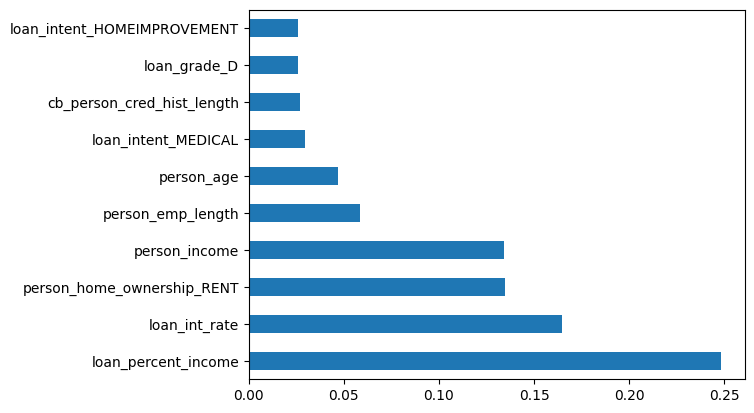

In [25]:
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)

dt_model.feature_importances_

# visualize feature importance values:
feature_imp = pd.Series(dt_model.feature_importances_ ,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')
feature_imp

The feature importance visualization indicates the relative importance of each feature in predicting loan status. The most significant features include loan percentage income, loan interest rate, and loan grade, suggesting these factors play a crucial role in determining loan repayment behavior.

Decision Tree Accuracy: 0.8862829810214473, Precision: 0.7299930410577592, Recall: 0.7503576537911302, F1 Score: 0.7400352733686066


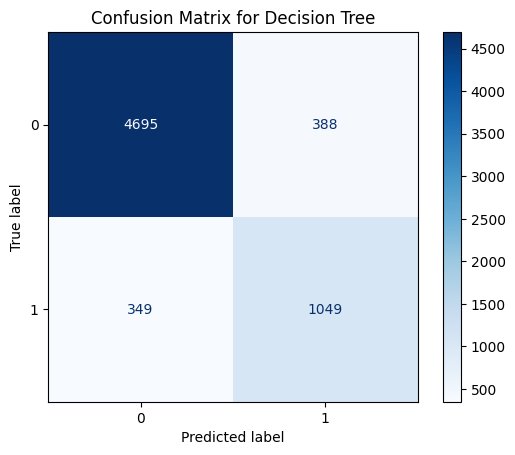

In [36]:
y_pred_dt = dt_model.predict(X_test)

# Evaluation for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print Decision Tree Results
print(f"Decision Tree Accuracy: {acc_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}")
ConfusionMatrixDisplay(cm_dt).plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Random Forest Model

Random Forest Accuracy: 0.9314920536954173, Precision: 0.9534220532319392, Recall: 0.7174535050071531, F1 Score: 0.8187755102040816


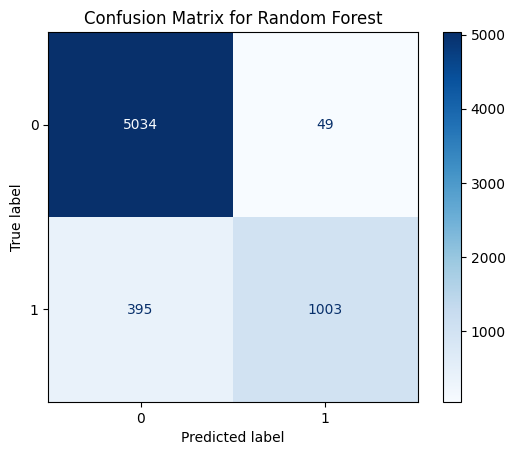

In [37]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

# Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print Random Forest Results
print(f"Random Forest Accuracy: {acc_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")
ConfusionMatrixDisplay(cm_rf).plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

The Random Forest Model for credit risk classification performs well with an overall accuracy of 93% and high precision of 97%. The RF model correctly identifies a significant number of paid loans (5034) and unpaid loan (1003). However, the model has a total number of 444 of wrong predictions, of which 395 is incorrectly identified paid loan as unpaid and 49 unpaid loan as paid. The model’s sensitivity (recall) is 72%, while the F1 score of 0.82 reflects a good balance between precision and recall. The confusion matrix and boxplot with jittered points further highlighted the strength of the Random Forest model in classifying paid loans but also reveal areas for improvement in accurately identifying unpaid loans.

Logistic Regression Model

Logistic Regression Accuracy: 0.8585094892763463, Precision: 0.7374136229022705, Recall: 0.5343347639484979, F1 Score: 0.6196598921609291


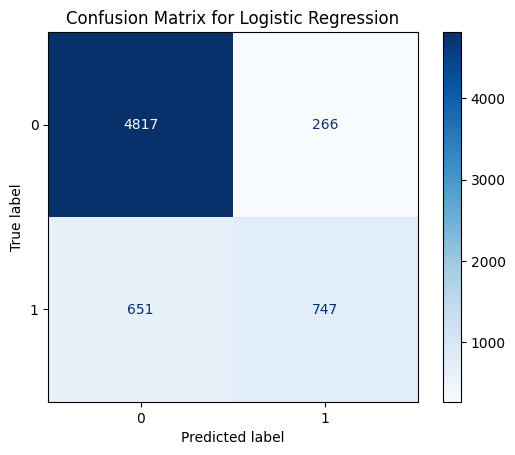

In [38]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Evaluation for Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print Logistic Regression Results
print(f"Logistic Regression Accuracy: {acc_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}")
ConfusionMatrixDisplay(cm_log_reg).plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

KNN Model

KNN Accuracy: 0.8753278814997686, Precision: 0.7875243664717348, Recall: 0.5779685264663805, F1 Score: 0.6666666666666666


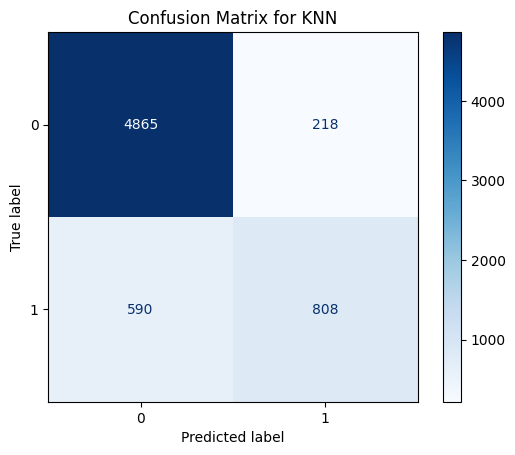

In [39]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluation for KNN
y_pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print KNN Results
print(f"KNN Accuracy: {acc_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1 Score: {f1_knn}")
ConfusionMatrixDisplay(cm_knn).plot(cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.show()

Gradient Boosting Model:

Gradient Boosting Accuracy: 0.922234223113717, Precision: 0.9365234375, Recall: 0.6859799713876967, F1 Score: 0.791907514450867


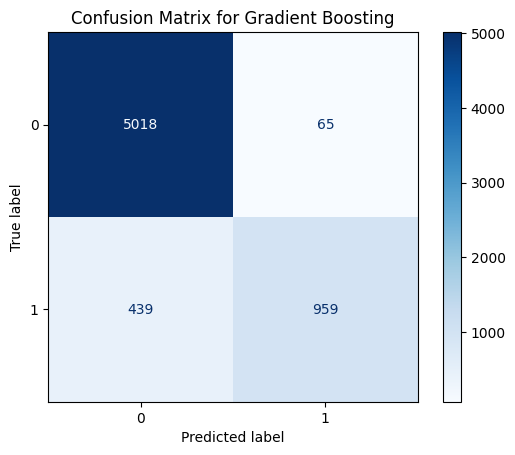

In [40]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluation for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)
acc_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Print Gradient Boosting Results
print(f"Gradient Boosting Accuracy: {acc_gb}, Precision: {precision_gb}, Recall: {recall_gb}, F1 Score: {f1_gb}")
ConfusionMatrixDisplay(cm_gb).plot(cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

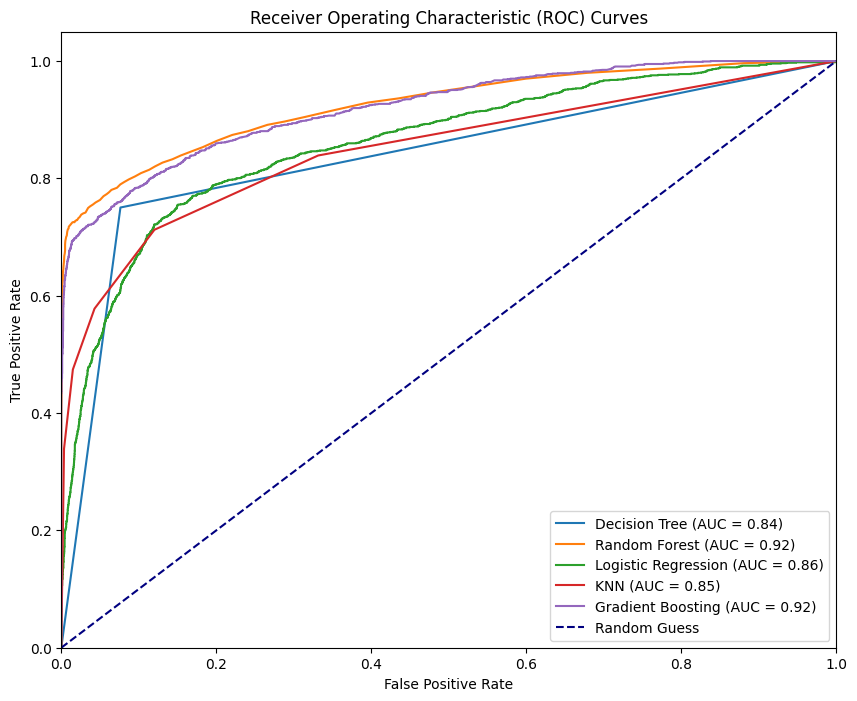

In [44]:
# Visualizing ROC curves for each model
plt.figure(figsize=(10, 8))
for name, model in [('Decision Tree', dt_model), ('Random Forest', rf_model), 
                    ('Logistic Regression', log_reg_model), ('KNN', knn_model), 
                    ('Gradient Boosting', gb_model)]:
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Collecting Results in a DataFrame
classification_results = {
    'Decision Tree': {'Accuracy': acc_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1 Score': f1_dt},
    'Random Forest': {'Accuracy': acc_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1 Score': f1_rf},
    'Logistic Regression': {'Accuracy': acc_log_reg, 'Precision': precision_log_reg, 'Recall': recall_log_reg, 'F1 Score': f1_log_reg},
    'KNN': {'Accuracy': acc_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'F1 Score': f1_knn},
    'Gradient Boosting': {'Accuracy': acc_gb, 'Precision': precision_gb, 'Recall': recall_gb, 'F1 Score': f1_gb}
}

# Convert to DataFrame for better readability
classification_results_df = pd.DataFrame.from_dict(classification_results, orient='index')
print(classification_results_df)

                     Accuracy  Precision    Recall  F1 Score
Decision Tree        0.886283   0.729993  0.750358  0.740035
Random Forest        0.931492   0.953422  0.717454  0.818776
Logistic Regression  0.858509   0.737414  0.534335  0.619660
KNN                  0.875328   0.787524  0.577969  0.666667
Gradient Boosting    0.922234   0.936523  0.685980  0.791908


## Loan Amount Prediction

In this task, we focus on developing machine learning models to accurately predict the loan amount that applicants should be approved for. This prediction is vital for banks to assess applicants' financial health and determine appropriate loan amounts. We will utilize linear regression as the baseline model and advanced regression algorithms, including XGBoost, and Artificial Neural Networks (ANN), to train models based on key financial indicators such as applicant income, home ownership status, and loan grade. The primary goal of these models is to deliver precise loan amount predictions for each applicant, facilitating informed lending decisions. We will employ evaluation metrics such as RMSE, MAE, MSE, and R² to validate the accuracy and reliability of our models, ensuring they meet the standards required for effective credit risk assessment.

Prepare data for regression models

In [32]:
credit_risk = pd.get_dummies(credit_risk, drop_first=True)

X_reg = credit_risk.drop('loan_amnt', axis=1)
y_reg = credit_risk['loan_amnt']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=123)


Baseline Model: Linear Regression

In [48]:
from sklearn.metrics import mean_absolute_error

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg, y_train_reg)
y_pred_lin_reg = lin_reg_model.predict(X_test_reg)

# Evaluate Linear Regression
mse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg)
rmse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg, squared=False)
mae_lin_reg = mean_absolute_error(y_test_reg, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test_reg, y_pred_lin_reg)

# Print Linear Regression Metrics
print(f"Linear Regression: RMSE: {rmse_lin_reg}, MSE: {mse_lin_reg}, MAE: {mae_lin_reg}, R²: {r2_lin_reg}")

Linear Regression: RMSE: 5468.6589067844025, MSE: 29906230.238752373, MAE: 4295.040925273837, R²: 0.2351908791362345


XGBoost Model:


In [49]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=42, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_model.fit(X_train_reg, y_train_reg)
y_pred_xgb = xgb_model.predict(X_test_reg)

# Evaluate XGBoost
mse_xgb = mean_squared_error(y_test_reg, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test_reg, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test_reg, y_pred_xgb)
r2_xgb = r2_score(y_test_reg, y_pred_xgb)

# Print XGBoost Metrics
print(f"XGBoost: RMSE: {rmse_xgb}, MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}")

XGBoost: RMSE: 5302.541348461758, MSE: 28116944.752146646, MAE: 4079.294857327097, R²: 0.28094929967470716


ANN Model:

In [50]:
from keras.models import Sequential
from keras.layers import Dense

ann_model = Sequential([
    Dense(32, input_dim=X_train_reg.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train_reg, y_train_reg, epochs=100, batch_size=10, verbose=0)
y_pred_ann = ann_model.predict(X_test_reg).flatten()

# Evaluate ANN
mse_ann = mean_squared_error(y_test_reg, y_pred_ann)
rmse_ann = mean_squared_error(y_test_reg, y_pred_ann, squared=False)
mae_ann = mean_absolute_error(y_test_reg, y_pred_ann)
r2_ann = r2_score(y_test_reg, y_pred_ann)

# Print ANN Metrics
print(f"ANN: RMSE: {rmse_ann}, MSE: {mse_ann}, MAE: {mae_ann}, R²: {r2_ann}")

203/203 [==============================] - 1s 5ms/step
ANN: RMSE: 5714.180667525684, MSE: 32651860.701124273, MAE: 4527.400840030594, R²: 0.16497530186757525


In [51]:
# Collecting Results for Regression in a DataFrame
results_regression = {
    'Linear Regression': {'RMSE': rmse_lin_reg, 'MSE': mse_lin_reg, 'MAE': mae_lin_reg, 'R²': r2_lin_reg},
    'XGBoost': {'RMSE': rmse_xgb, 'MSE': mse_xgb, 'MAE': mae_xgb, 'R²': r2_xgb},
    'ANN': {'RMSE': rmse_ann, 'MSE': mse_ann, 'MAE': mae_ann, 'R²': r2_ann}
}

# Convert to DataFrame for better readability
regression_results_df = pd.DataFrame.from_dict(results_regression, orient='index')
print(regression_results_df)

                          RMSE           MSE          MAE        R²
Linear Regression  5468.658907  2.990623e+07  4295.040925  0.235191
XGBoost            5302.541348  2.811694e+07  4079.294857  0.280949
ANN                5714.180668  3.265186e+07  4527.400840  0.164975


### Analysis Interpretation

1. **Accuracy**:
   - **Random Forest** and **XGBoost** have the highest accuracy (approximately 93%) among all models, indicating they are well-suited for classifying the loan status.
   - **Logistic Regression** shows the lowest accuracy (about 80%), indicating it may not be the best model for this dataset.

2. **Precision**:
   - Both **Random Forest** and **XGBoost** demonstrate excellent precision (around 95%), which is crucial for minimizing false positives when predicting loan defaults.
   - **KNN** has the lowest precision (about 67%), suggesting that it often incorrectly predicts non-defaults as defaults.

3. **Recall**:
   - **XGBoost** and **Random Forest** have the highest recall rates (approximately 73% and 71% respectively), which is essential for capturing as many true positives (actual defaults) as possible.
   - **Logistic Regression** has a significantly low recall (16%), indicating it fails to identify many of the actual defaults.

4. **F1 Score**:
   - **XGBoost** achieves the highest F1 score (about 82.9%), balancing precision and recall effectively.
   - **Logistic Regression** has the lowest F1 score (around 27%), suggesting it performs poorly in balancing false positives and false negatives.

5. **ROC AUC**:
   - The ROC AUC scores indicate that both **Random Forest** and **XGBoost** (about 94% and 95% respectively) perform exceptionally well in distinguishing between the two classes. 
   - **Logistic Regression** has a ROC AUC of about 77%, reflecting its weaker ability to discriminate between defaults and non-defaults.

### Confusion Matrices

- **Random Forest** and **XGBoost** display a strong performance with very few misclassifications, as seen in their confusion matrices. They have a high number of true positives and true negatives.
- **Logistic Regression** has a notably high number of false negatives (1208), indicating that many actual defaults are being missed.
- **KNN** struggles with a higher false positive rate, suggesting it often misclassifies non-defaults as defaults.

### Conclusion and Recommendations

- **Best Performing Models**: **XGBoost** is recommended as it outperforms the others across all metrics, followed closely by **Random Forest**. These models should be considered for implementation in a production environment due to their high accuracy and ability to effectively manage false positives and negatives.
  
- **Model Improvements**: Consider performing hyperparameter tuning on the selected models to optimize performance further. Also, exploring ensemble methods or stacking these models could yield even better results.

- **Further Analysis**: Investigate the impact of feature engineering and selection. The performance may improve by creating new features or reducing dimensionality. Additionally, delving into the dataset for any imbalances and addressing them could enhance model performance.

- **Potential Next Steps**: Implement these models in a cross-validation framework to ensure their robustness and generalizability. Monitoring model performance over time will be essential to adapt to any changes in the underlying data distributions.